<a href="https://colab.research.google.com/github/rootdrew27/ai-educational/blob/main/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Introduction to Neural Networks and AI**
*Using Micrograd and Python*
<br>
<br>
By Andrew Root

---



### Installs and Imports

In [1]:
!pip install micrograd
!pip install graphviz

In [170]:
from graphviz import Digraph

from micrograd import nn
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline

## Misc Functions

In [3]:
#@title Graphing Functions

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

# **Introduction to Neural Networks**

1.   Micrograd
2.   Mathematics
3.   Neurons, Layers, MLPs
4.   Run It!
4.   Pytorch

[Neural Net Graphic](https://cs231n.github.io/assets/nn1/neural_net2.jpeg)

[Micrograd](https://github.com/karpathy/micrograd/tree/master)


## Micrograd

In [ ]:
from micrograd.engine import Value

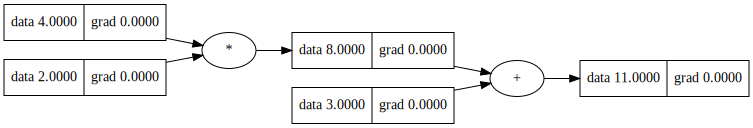

In [ ]:
np.random.seed(1337)
random.seed(1337)

input = Value(2.0)
w = Value(4.0)
b = Value(3.0)

y = w * input
L = y + b

draw_dot(L)

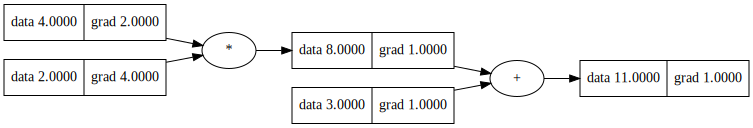

In [ ]:
L.backward()
draw_dot(L)

## Mathematics

### Mathematical Formulation --- Derivative

$
f'(x) = \dfrac{df}{dx} = \lim \limits_{h \to 0} \dfrac{f(x + h) - f(x)}{h}
$

In [ ]:
def f(x):
  return 2*x

In [ ]:
print(f'f(0) = {f(0)}')
print(f'f(1) = {f(1)}')
print(f'f(3) = {f(3)}')

f(0) = 0
f(1) = 2
f(3) = 6


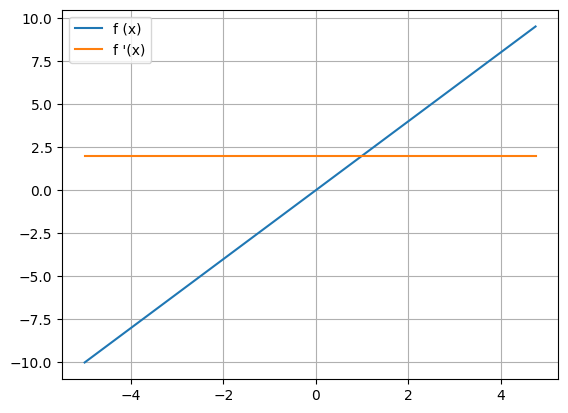

In [ ]:
xs = np.arange(-5,5,.25)
ys = f(xs)
y = [2 for i in range(len(xs))]
plt.plot(xs, ys, label = 'f (x)')
plt.plot(xs, y, label = 'f \'(x)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def f(x):
  return 3 * x**2 - 4 * x +5

$g(x) = 3x^2 - 4x + 5$

In [ ]:
print(f'f(0) = {f(0)}')
print(f'f(1) = {f(1)}')
print(f'f(-4) = {f(-2)}')

f(0) = 5
f(1) = 4
f(-4) = 25


For example $\dfrac{df}{dx} = 6x - 4$



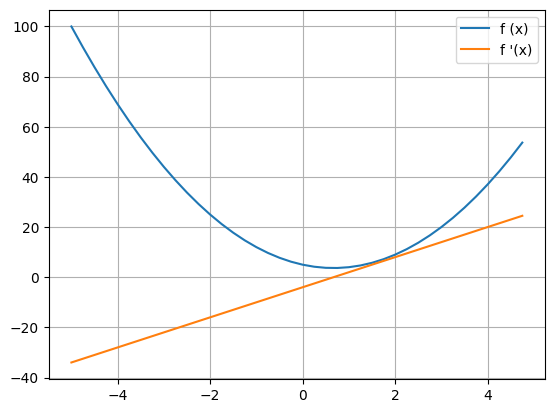

In [ ]:
def dfdx(x):
  return 6 * x - 4

xs = np.arange(-5,5,.25)
ys = f(xs)
ys2 = dfdx(xs)

plt.plot(xs, ys, label = 'f (x)')
plt.plot(xs, ys2, label = 'f \'(x)')
plt.legend()
plt.grid()
plt.show()

### Mathematical Formulation --- Gradient

$ \nabla f(x_1, x_2, ... x_n) = \langle \dfrac{\partial f}{\partial x_1} , \dfrac{\partial f}{\partial x_2}, ... \dfrac{\partial f}{\partial x_n}\rangle$

<br>

**Points in the direction of greatest change!**
<br>
Drawing Time!

### Mathematical Formulation --- Chain Rule

**If a car is going 4 times as fast as a biker and the biker is going 2 times as fast as a pedestrian, how fast is the car going w.r.t the pedestrian??**




For a variable $z$, which is dependent upon $y$, which is dependent upon $x$, the derivative of $z$ w.r.t $x$ is:
<br>
<br>
$\dfrac{dz}{dx} = \dfrac{dz}{dy} * \dfrac{dy}{dx}$

<br>

Equivalently, for a funciton $h(x) = f(g(x))$ the derivative is $h'(x) = f'(g(x)) * g'(x)$

## Neurons, Layers, MLPs, Oh My!

### Forward Pass

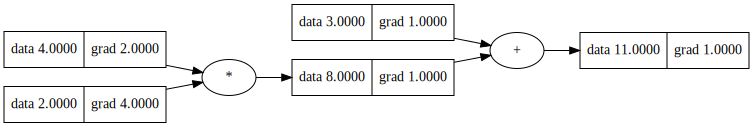

In [ ]:
np.random.seed(1337)
random.seed(1337)

input = Value(2.0)
w = Value(4.0)
b = Value(3.0)

y = w * input
L = y + b

L.backward()
draw_dot(L)

### Back Propagation






$ \dfrac{dL}{dw} = \dfrac{dL}{dy} * \dfrac{dy}{dw}$

<br>
<br>

$ \dfrac{dL}{dy} = 1$
<br>
<br>
$\dfrac{dy}{dw} = 2$
<br>
<br>


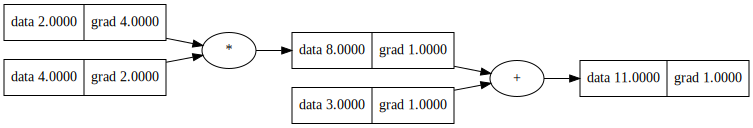

In [ ]:
L.backward()
draw_dot(L)

### Activation Functions

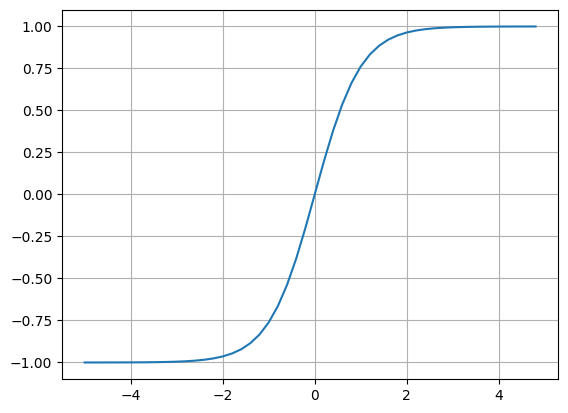

In [ ]:
plt.plot(np.arange(-5,5,.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

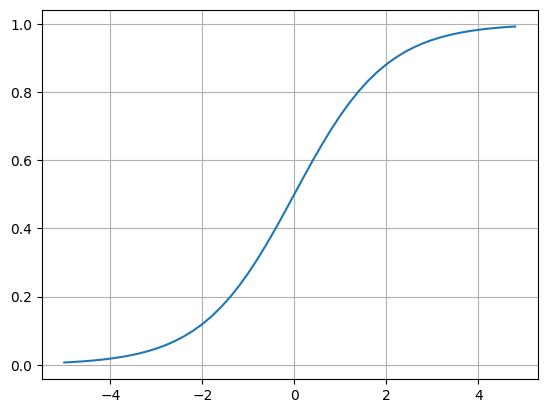

In [ ]:
def sigmoid(X):
   return 1/(1+np.exp(-X))

plt.plot(np.arange(-5,5,.2), sigmoid(np.arange(-5,5,0.2))); plt.grid();

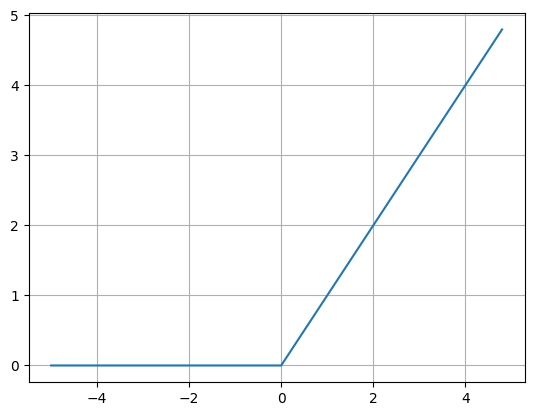

In [ ]:
def relu(X):
   return np.maximum(0,X)

plt.plot(np.arange(-5,5,.2), relu(np.arange(-5,5,0.2))); plt.grid();

### Loss Functions


Used to measure the degree to which are predicted values differ from the actual value.

Examples:

**MSE** = $\displaystyle \dfrac{1}{N} * \sum_{i}^{N}  (y_i - \bar y)^2$
<br>
**Log Loss** <br>
**Binary Cross Entropy**


In [ ]:
# The 'y_pred' list is a list probabilities; the probability that the input value is class 1.
# The 'y_true' list is a list of the class values
def binary_cross_entropy(y_pred, y_true):

  assert len(y_pred) == len(y_true) # sum of samples equals num of labels

  def sig(x):
    return 1/(1 + np.exp(-x))

  y_pred = np.array([sig(y.data) for y in y_pred])
  y_true = np.array(y_true)

  y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return Value(loss, ())

In [29]:
def max_margin_loss(scores, y_true):

  losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(y_true, scores)]
  avg_loss = sum(losses) * (1.0 / len(losses))

  return avg_loss

In [9]:
def mse(y_pred, y_true):
  losses = [(pred - true)**2 for pred, true in zip(y_pred, y_true)]
  loss = sum(losses) * (1.0 / len(losses))
  return loss

In [ ]:
# CHALLENGE: IMPLEMENT A LOSS FUNCTION

def your_loss_func(y_pred, y_true):
  pass

In [31]:
preds = [Value(-1), Value(1)]
true = [-1,1]

max_margin_loss(preds, true)

Value(data=0.0, grad=0)

In [22]:
preds = [Value(9), Value(10)]
true = [10, 12]

mse(preds, true)

Value(data=2.5, grad=0)

### Neuron

Each Neuron has $x + 1$ parameters, where $x$ is the size of the input vector.

The gradient is taken, w.r.t each parameter.

[Karpathys Images](https://www.google.com/search?sca_esv=85596a7ea76cb4a1&sca_upv=1&sxsrf=ACQVn0_iOIZxTq0luSnk6ZxtoNvM24NjaA:1713623320069&q=cs231n+neuron&uds=AMwkrPuyqEkls4Ckdf3Xn72nW7AL5CkHaCVWGs-cajomsokn8lOgguukz8CJTWucGKTgs8RH5HpesZTC0gzC0TMraaPqrftHoYDSwdaYPUzd6fdXHboLHoFbkpnxsrUAZAYl4hNN22-hRnrMLw-kZFilhSRN5RFVYivGKQZwHaOpI-StzgKTJJCBXiMVMuefiXEkf8uF9pr5RM2OxAjPcN06yS-VDOwK4SpP6LwcGx8LGbpdQBriTm2m__-JmaMBZc8IaJE2UlcBqWo3XqC_H4UfXDrC0UEQofORMBAVTCoCHPQWbhMn1K6JZTF-narrp1A_FQz3TaYS&udm=2&prmd=ivsnmbtz&sa=X&ved=2ahUKEwjp2JWqgNGFAxW9ADQIHVr9An8QtKgLegQIGxAB&biw=1278&bih=917&dpr=1#vhid=EErT7l9gJn-7uM&vssid=mosaic)

In [ ]:
from micrograd.nn import Neuron

n = Neuron(3)

In [ ]:
len(n.parameters())

4

### Layer

In [ ]:
x = [Value(1.0), Value(3.0), Value(2.0), Value(1.0), Value(2.0), Value(5.0)]

In [ ]:
from micrograd.nn import Layer

layer = Layer(6, 3)
layer(x)

[Value(data=2.54235289377313, grad=0),
 Value(data=1.3107754360551502, grad=0),
 Value(data=0, grad=0)]

A Neuron is a Column!
A Layer is a matrix!
A MLP is multiple matrixs!

### MLP

In [ ]:
from micrograd.nn import MLP

mlp = MLP(4, [4, 2, 1])

In [ ]:
mlp.layers

[Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)],
 Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)],
 Layer of [LinearNeuron(3)]]

In [ ]:
o = mlp(x)

In [ ]:
draw_dot(o)

How big is chatgpt?

In [ ]:
len(mlp.parameters())

67

## Run It!

In [162]:
iterations = 10

# inputs
inputs = [
    [0.2, -0.1, 0.2, 0.1],
    [0.2, 0.1, 0.4, 0.4],
    [0.1, -0.1, 0.3, 0.1],
    [0.1, 0.4, 0.4, 0.1]
]
y_true = [1, -1, 1, -1] # class Labels

mlp = MLP(4, [4, 1]) # The model

In [163]:
# Training

# (iters) number of iterations
# (n_net) the neural network
# (l_func) the loss func
# (inputs) the input data to be trained upon
# (vals) the vals to be predicted


def train(iters, n_net, l_func, learning_rate, inputs, vals):
  for i in range(iters):

    #forward
    preds = [n_net(input) for input in inputs]
    loss = l_func(preds, vals)

    #backward
    n_net.zero_grad()
    loss.backward()

    for p in n_net.parameters():
      # CHALLENGE: IMPLEMENT DECAYING LEARNING RATE???
      p.data -= learning_rate * p.grad # update the paremeters (weights and biases)

  return n_net, loss

In [164]:
mlp, loss = train(10, mlp, max_margin_loss, .1, inputs, y_true)
print(loss)

Value(data=0.7276439816428649, grad=1)


In [165]:
mlp.layers[1].neurons[0].parameters()

[Value(data=-0.5569058462075395, grad=0.0),
 Value(data=-0.27580702551905606, grad=-0.15930360004045482),
 Value(data=-1.065190431631969, grad=0.2534871290805238),
 Value(data=-0.29494203214591536, grad=0.2010042933644562),
 Value(data=0.0, grad=0.0)]

## Pytorch

An industry (and research) grade Machine Learning framework (library, package, whatever).

In [166]:
import torch
from torch import nn
import math

In [ ]:
x1 = torch.Tensor([2.0]); x1.requires_grad = True;

x1.__dir__() # Lets see what we can do with these Tensor fellows...

### SETUP

In [167]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [172]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

### Data

(50000, 784)


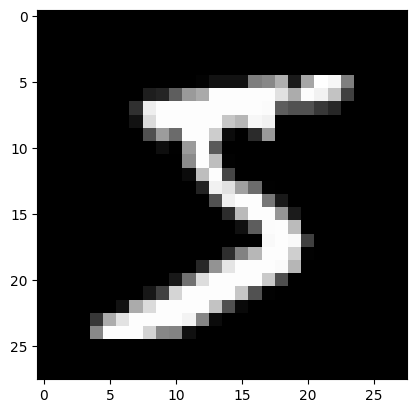

In [174]:
plt.imshow(x_train[0].reshape((28, 28)), cmap="gray")
# ``pyplot.show()`` only if not on Colab
try:
    import google.colab
except ImportError:
    plt.show()
print(x_train.shape)

### Neural Net

In [175]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [176]:
weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [177]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

In [178]:
bs = 64  # batch size

xb = x_train[0:bs]  # a mini-batch from x
preds = model(xb)  # predictions
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.4258, -1.8444, -1.9972, -1.9441, -2.7068, -2.9058, -2.9597, -2.8428,
        -2.0650, -2.1519], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [179]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

In [180]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3707, grad_fn=<NegBackward0>)


In [181]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [ ]:
print(accuracy(preds, yb))

In [186]:
from IPython.core.debugger import set_trace

lr = 0.5  # learning rate
epochs = 2  # how many epochs to train for

for epoch in range(epochs):
    for i in range((n - 1) // bs + 1):
        #         set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [187]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0676, grad_fn=<NegBackward0>) tensor(1.)


In [188]:
pred = model(x_train[0])

In [203]:
max([(x, i) for i,x in enumerate(pred.detach().numpy())])

(-0.14883518, 5)

In [204]:
y_train[0]

tensor(5)

NEXT STEPS:
<br>
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

[Karpathy's Site](https://karpathy.ai/)